In [1]:
import tensorflow as tf 
from tensorflow import keras 

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
from tensorflow.keras import layers, models

In [4]:
import matplotlib.pyplot as plt

In [5]:
from keras.utils import to_categorical

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
training_data = '/home/rhea/Documents/sem7/Deep learning/practicals/dataset2/training'
testing_data = '/home/rhea/Documents/sem7/Deep learning/practicals/dataset2/testing'

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Data augmentation: rotate images by up to 20 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for testing data

In [10]:
# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    training_data,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

Found 787 images belonging to 4 classes.


In [11]:
# Load testing data
test_generator = test_datagen.flow_from_directory(
    testing_data,
    target_size=(128,128),
    batch_size= 32,
    class_mode='categorical'
)

Found 338 images belonging to 4 classes.


In [12]:
# Calculate the number of classes
num_classes = len(train_generator.class_indices)

In [13]:
print(num_classes)

4


In [14]:
# Split training data into train and validation sets
train_data, train_labels = train_generator.next()
val_data, val_labels = train_generator.next()

In [15]:
# Print shape of the training and validation data
print("train data shape:", train_data.shape)
print("train labels shape:", train_labels.shape)
print("val data shape:", val_data.shape)
print("val labels  shape:", val_labels.shape)

train data shape: (32, 128, 128, 3)
train labels shape: (32, 4)
val data shape: (32, 128, 128, 3)
val labels  shape: (32, 4)


In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape= (128,128,3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu')                     


                        ]
)

NameError: name 'keras' is not defined

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

NameError: name 'model' is not defined

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(train_data, train_labels, epochs=10, 
                    validation_data=(val_data, val_labels))

NameError: name 'model' is not defined

In [22]:
test_loss, test_acc = model.evaluate(val_data, val_labels, verbose=2)


1/1 - 0s - loss: 0.9533 - accuracy: 0.6875 - 217ms/epoch - 217ms/step


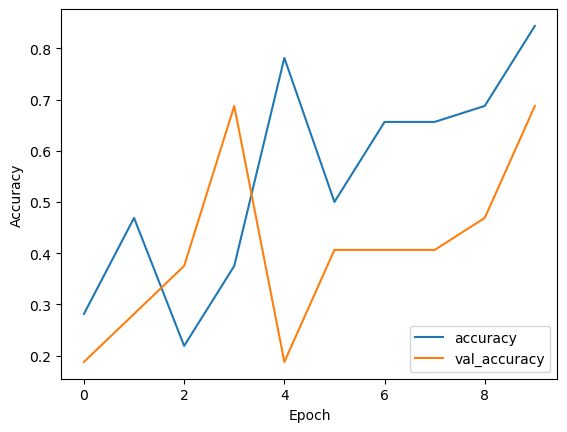

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

In [28]:
test_data, test_labels = test_generator.next()

In [29]:
# evaluating on testing data 
loss, acc = model.evaluate(test_data,test_labels,verbose = 2)

1/1 - 0s - loss: 0.7350 - accuracy: 0.7500 - 174ms/epoch - 174ms/step
